# 4- Modeling 

In [1]:
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

import xgboost as xgb

from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier



 # Measure of Performance
    
from sklearn.model_selection import cross_val_score
  
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score

from sklearn.metrics import precision_score

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import mean_squared_error

## logistic Regression

In [45]:
logreg= LogisticRegression()

logreg.fit(X_train,y_train)

pred_logreg = logreg.predict(X_test)

## Evaluating the performance of the model

### Confusion Matrix

In [46]:
pd.DataFrame(confusion_matrix(y_test, pred_logreg),\
             columns= ["Predicted Not Survived", "Predicted Survived"],\
             index = ["Not-Survived", "Survived"])


,Predicted Not Survived,Predicted Survived
Not-Survived,155,29
Survived,22,89


### Accuracy Score

In [47]:
acc_score_logreg= accuracy_score(y_test, pred_logreg)
print(acc_score_logreg)

0.8271186440677966


### Precision Score

In [48]:
precision_score_logreg = precision_score(y_test,pred_logreg)
print(precision_score_logreg)

0.7542372881355932


### Recall Score

In [49]:
recall_score_logreg = recall_score(y_test,pred_logreg)
print(recall_score_logreg)

0.8018018018018018


### AUC & ROC Curve

0.867508813160987


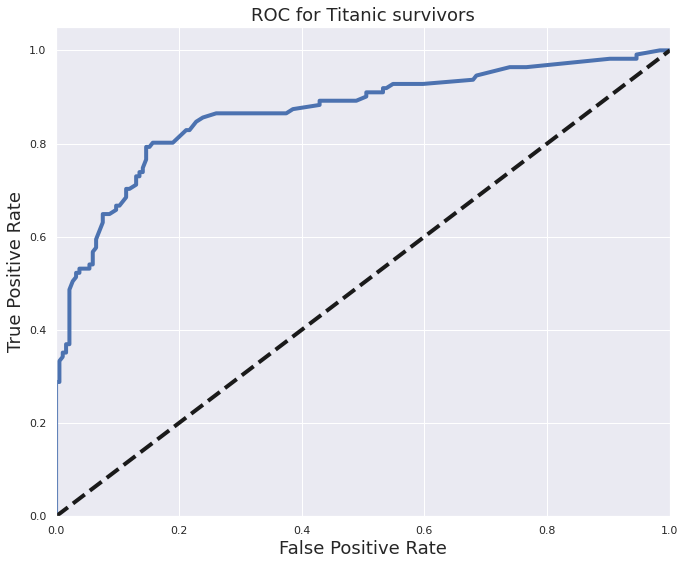

In [50]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

## Naive Bayes

In [51]:
gnb = GaussianNB()

cv = cross_val_score(gnb, X_train,y_train, cv=5)

print(cv)
print(cv.mean())

[0.71666667 0.76470588 0.76470588 0.69747899 0.76470588]
0.7416526610644258


## Logistic Regression

In [52]:
log_reg = LogisticRegression(max_iter = 2000)

cv = cross_val_score(log_reg, X_train,y_train, cv=5)


print(cv)
print(cv.mean())

[0.81666667 0.81512605 0.82352941 0.83193277 0.87394958]
0.8322408963585435


## Decision Tree

In [53]:
dt = DecisionTreeClassifier(random_state= 1)

cv= cross_val_score(dt, X_train,y_train,cv=5)

print(cv)
print(cv.mean())

[0.76666667 0.78151261 0.76470588 0.81512605 0.81512605]
0.788627450980392


##  KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)

cv= cross_val_score(knn, X_train,y_train, cv=5)

print(cv)
print(cv.mean())

[0.75833333 0.78151261 0.81512605 0.81512605 0.82352941]
0.7987254901960783


## Random Forest Classifier

In [55]:
rf_clf = RandomForestClassifier(random_state= 1)

cv = cross_val_score(rf_clf, X_train,y_train, cv=5)

print(cv)
print(cv.mean())

[0.78333333 0.81512605 0.79831933 0.80672269 0.81512605]
0.8037254901960784


## Support Vector Machine

In [56]:
svc = SVC(probability = True)

cv = cross_val_score(svc, X_train,y_train, cv=5)

print(cv)
print(cv.mean())

[0.79166667 0.83193277 0.80672269 0.79831933 0.86554622]
0.8188375350140056


## XGBClassifier

In [57]:
xgb= XGBClassifier(random_state=1)

cv = cross_val_score(xgb, X_train,y_train, cv= 5)

print(cv)
print(cv.mean())


[0.76666667 0.82352941 0.79831933 0.81512605 0.82352941]
0.8054341736694678


## Voting Classifier

In [59]:
voting_clf = VotingClassifier(estimators=[('gnb',gnb),('log_reg',log_reg),('dt',dt),('knn',knn),('rf_clf',rf_clf),('svc',svc),('xgb',xgb) ], voting='soft', n_jobs=4)


In [60]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.775      0.83193277 0.78151261 0.80672269 0.83193277]
0.8054201680672268


## Summary of the accuracy of all models

- Naive Bayes :(0.74%)
- Logistic Regression : (0.83%)
- Decision Tree Classifier : (0.78%)
- K Nearest Neighbor : (0.79%)
- Random Forest Classifier : (0.80%)
- SVC : (0.81%)
- XGB : (0.80%)
- Voting Classifier : (0.83%)